In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.shape

(891, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [26]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-28-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [29]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
# For tree-based models like RandomForest
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'] = df['Deck'].replace('n', 'U')
df.drop('Cabin', axis=1, inplace=True)


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,U


In [32]:
df.Sex=df.Sex.map({'male':1,'female':0})

In [33]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
df['Embarked'].fillna('S', inplace=True)

<ipython-input-34-6ad30875ebf2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


ONE HOT ENCODING

In [35]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [36]:
df['Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [37]:
df['Deck']=df['Deck'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'U':7})

OUTLIER DETECTION AND REMOVAL

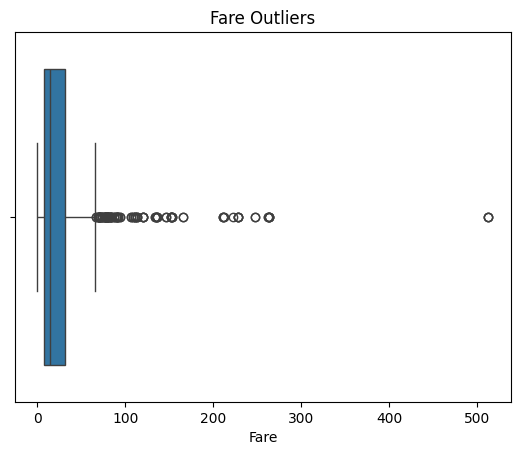

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()


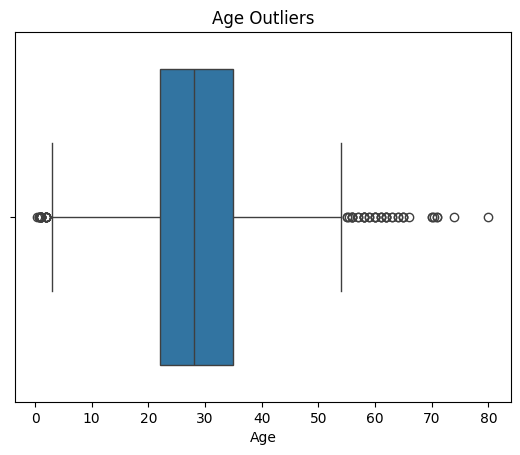

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.title('Age Outliers')
plt.show()

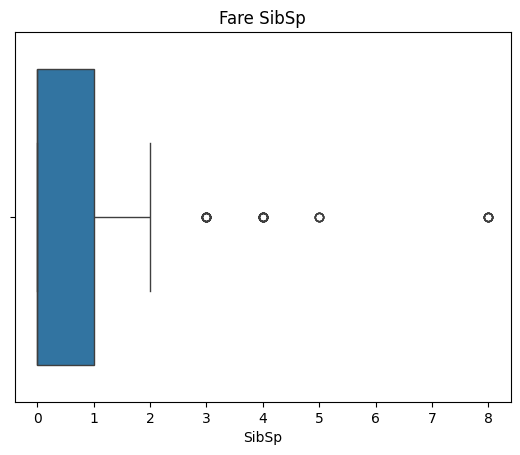

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['SibSp'])
plt.title('Fare SibSp')
plt.show()

In [39]:
import numpy as np

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply it
clean_df = remove_outliers_iqr(df, ['Age', 'Fare', 'SibSp', 'Parch'])


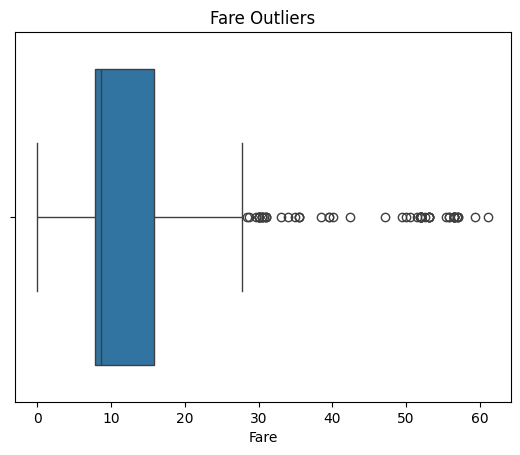

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=clean_df['Fare'])
plt.title('Fare Outliers')
plt.show()

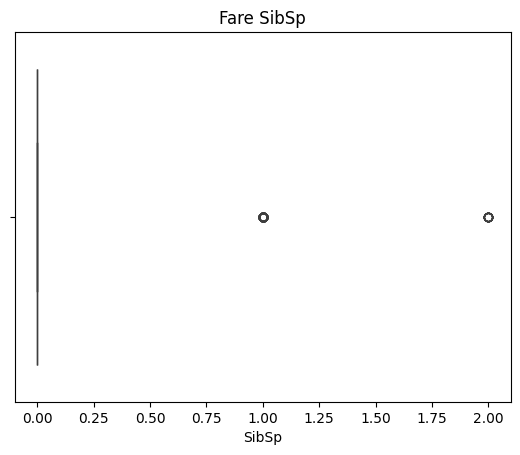

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=clean_df['SibSp'])
plt.title('Fare SibSp')
plt.show()

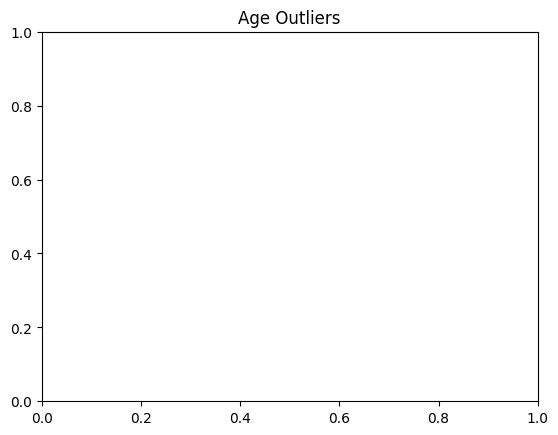

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(clean_df=df['Age'])
plt.title('Age Outliers')
plt.show()

In [46]:
clean_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,7.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,7.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,7.0
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,2,7.0


MODEL EVALUATION


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = clean_df.drop(['Survived','Ticket','Name'], axis=1)
y = clean_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8362068965517241

Confusion Matrix:
 [[81  6]
 [13 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90        87
           1       0.73      0.55      0.63        29

    accuracy                           0.84       116
   macro avg       0.79      0.74      0.76       116
weighted avg       0.83      0.84      0.83       116



HYPER PARAMETER TUNING


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.853448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91        87
           1       0.77      0.59      0.67        29

    accuracy                           0.85       116
   macro avg       0.82      0.76      0.79       116
weighted avg       0.85      0.85      0.85       116

